<a href="https://colab.research.google.com/github/egmavis/nocode-lowcode/blob/main/EDA_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring the Texts of *Emma* and *Jane Eyre*

## Ingest Text Data

Here we will import the raw text of the novels from the Github Repo.

In [ ]:
import spacy.cli
spacy.cli.download("en_core_web_lg")

In [3]:
from pathlib import Path
import spacy

In [ ]:
!rm *.txt
!wget https://raw.githubusercontent.com/egmavis/nocode-lowcode/main/emma.txt
!wget https://raw.githubusercontent.com/egmavis/nocode-lowcode/main/jane.txt

In [15]:
emma = Path("emma.txt").read_text()
jane = Path("jane.txt").read_text()


## EDA

#### Document Similarity

First, we will look at the similarity of the novels before removing the common stop-words.

In [7]:
nlp = spacy.load("en_core_web_lg")

In [16]:
emma_book = nlp(emma)
jane_book = nlp(jane)

In [17]:
emma_book.similarity(jane_book)

0.99622589176613

As expected, the similarity between these two novels is extremely high. The authors lived in similar times, write about similar themes, and have a similar style. Let's see if removing the stop words will reduce the similarity.

#### Remove Stop Words

In [ ]:
import nltk
nltk.download("stopwords")
nltk.download("punkt")
!python -m textblob.download_corpora

In [19]:
from textblob import TextBlob
from nltk.corpus import stopwords

In [20]:
stop_words = stopwords.words("english")

In [22]:
emma_blob = TextBlob(emma)
jane_blob = TextBlob(jane)

In [23]:
emma_count = emma_blob.word_counts.items()
jane_count = jane_blob.word_counts.items()

In [24]:
def remove_stop_words(text):
  no_stop = []
  for word in text:
    if word[0] not in stop_words:
      no_stop.append(word[0])
  return no_stop

In [26]:
emma_no_stop_words = remove_stop_words(emma_count)
jane_no_stop_words = remove_stop_words(jane_count)

In [48]:
emma_no_stop_words[:5]

['chapter', 'emma', 'woodhouse', 'handsome', 'clever']

In [28]:
emma2 = ' '.join(emma_no_stop_words)
jane2 = ' '.join(jane_no_stop_words)

In [30]:
emma_book2 = nlp(emma2)
jane_book2 = nlp(jane2)
emma_book2.similarity(jane_book2)

0.9667629969977636

Great, the similarity between the two novels has dropped as the stop words drop. But again, still highly similar. Let's take a look at the word clouds to see if that similarity can be visually reflected.

## Visualize with Word cloud

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [32]:
emma_wordcloud = WordCloud().generate(emma2)
jane_wordcloud = WordCloud().generate(jane2)

(-0.5, 399.5, 199.5, -0.5)

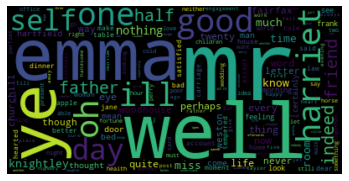

In [34]:
plt.imshow(emma_wordcloud, interpolation="bilinear")
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

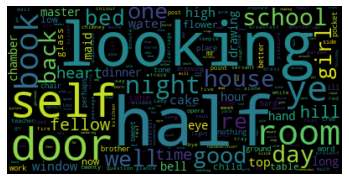

In [35]:
plt.imshow(jane_wordcloud, interpolation="bilinear")
plt.axis("off")

## AWS NoCode/LowCode NLP Tool

We will now transition to AWS Quicksight for additional data visualization tools. First we need to convert the word frequency from both novels into dataframes and create new csv files of those dataframes.

*Note: Quicksight is not offered with AWS free tier account, I used a temporary trial for the purposes of this visualization.*

In [65]:
from pandas import DataFrame
emma_df = DataFrame(emma_count)
jane_df = DataFrame(jane_count)

In [ ]:
emma_df.head()

In [ ]:
jane_df.head()

In [70]:
emma_df.to_csv("emma-word-counts.csv")
jane_df.to_csv("jane-word-counts.csv")

Analyses generated from AWS Quicksight are integrated in repo as images in the README file.